In [142]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [143]:
# !pip install mlxtend

In [144]:
df = pd.DataFrame({'x1':[1,2,3,4,5,6,6,7,9,9], 'x2':[5,3, 6, 8, 1, 9, 5 , 8, 9, 2 ], 'label': [1,1, 0, 1, 0, 1, 0, 1, 0, 0]})

In [145]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='x1', ylabel='x2'>

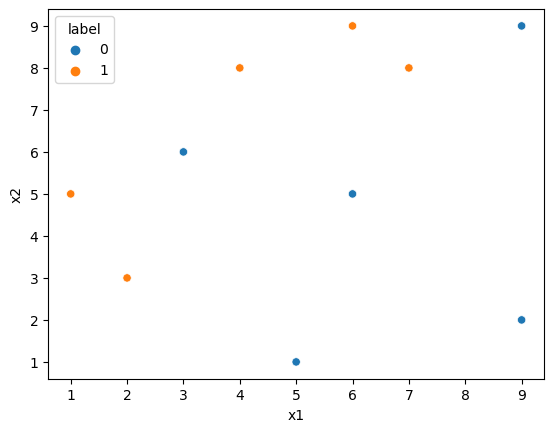

In [146]:
import seaborn as sns
sns.scatterplot(x=df['x1'], y=df['x2'], hue=df['label'])

In [147]:
df['weights'] = 1/df.shape[0]

In [148]:
df

,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [149]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)

In [150]:
X = df.iloc[:, 0:2].values
y = df.iloc[:,2].values

In [151]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

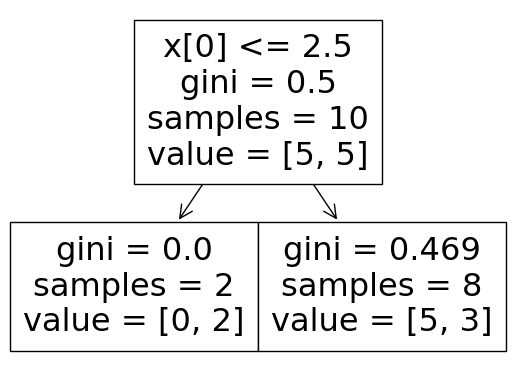

In [152]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

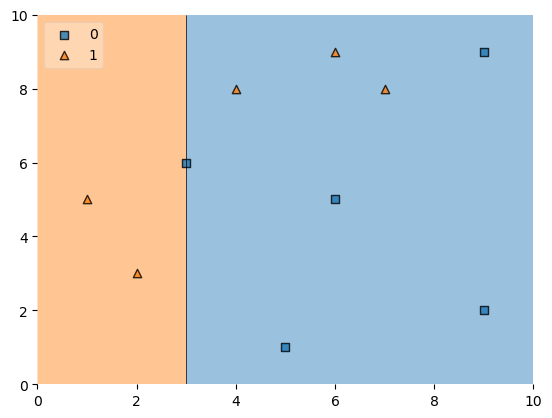

In [153]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [154]:
df['y_pred'] = dt1.predict(X)

In [155]:
df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [156]:
def calculate_model_weight(error):
    alpha = 0.5 * np.log((1-error)/error)
    return alpha
    

In [157]:
# step3- calculate model weight
alpha1 = calculate_model_weight(3/10)
alpha1

0.42364893019360184

In [158]:
# step4- Update weights
def update_new_weight(row, alpha=0.423):
    if row['label']==row['y_pred']:
         return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)
     

In [159]:
df['updated_weights'] = df.apply(update_new_weight, axis=1)

In [160]:
df

,x1,x2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [161]:
df['updated_weights'].sum()

0.9165153319682015

In [162]:
df['normalized_weights']  = df['updated_weights']/df['updated_weights'].sum()

In [163]:
df

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [164]:
df['normalized_weights'].sum()

1.0

In [165]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights']) #np.cumsum(arr): it is used to find the cumulative sum  
df['cumsum_upper']

0    0.071475
1    0.142950
2    0.214425
3    0.380983
4    0.452458
5    0.619017
6    0.690492
7    0.857050
8    0.928525
9    1.000000
Name: cumsum_upper, dtype: float64

In [166]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']
df['cumsum_lower']

0    0.000000
1    0.071475
2    0.142950
3    0.214425
4    0.380983
5    0.452458
6    0.619017
7    0.690492
8    0.857050
9    0.928525
Name: cumsum_lower, dtype: float64

In [167]:
df[['x1', 'x2', 'label','weights','y_pred', 'updated_weights', 'cumsum_lower', 'cumsum_upper']]

,x1,x2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [168]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

        

In [169]:
index_values = create_new_dataset(df)
index_values

[5, 8, 8, 8, 3, 9, 6, 8, 3, 8]

In [170]:
second_df = df.iloc[index_values, [0,1,2,3]]
second_df
# second_df = pd.DataFrame()

,x1,x2,label,weights
5,6,9,1,0.1
8,9,9,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
3,4,8,1,0.1
9,9,2,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1


In [171]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [172]:
X2 = second_df.iloc[:, 0:2].values
y2 = second_df.iloc[:,2].values

In [173]:
dt2.fit(X2,y2)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 7.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]')]

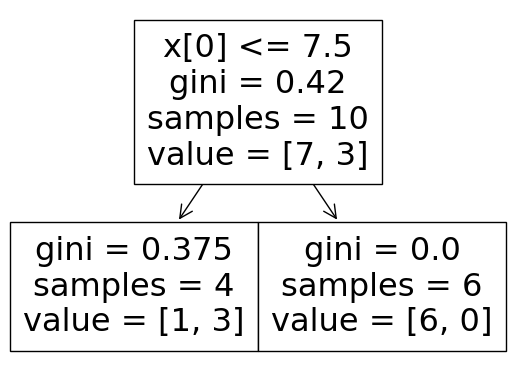

In [174]:
plot_tree(dt2)

<Axes: >

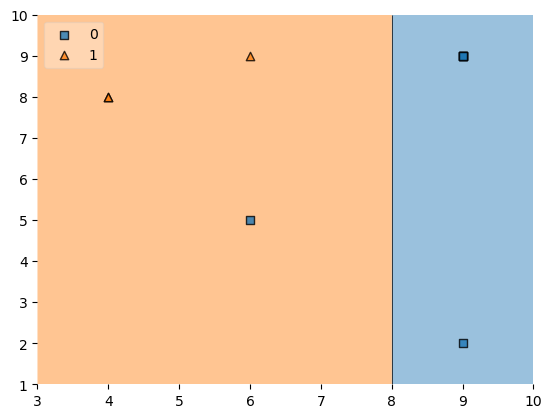

In [175]:
plot_decision_regions(X2, y2, clf=dt2, legend=2)

In [176]:
second_df['y_pred2'] = dt2.predict(X2)

In [177]:
second_df

,x1,x2,label,weights,y_pred2
5,6,9,1,0.1,1
8,9,9,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
3,4,8,1,0.1,1
9,9,2,0,0.1,0
6,6,5,0,0.1,1
8,9,9,0,0.1,0
3,4,8,1,0.1,1
8,9,9,0,0.1,0


In [178]:
alpha2 = calculate_model_weight(0.1)

In [179]:
alpha2

1.0986122886681098

In [180]:
#step-4: Update weights
def update_row_weights(row, alpha=1.09):
    if row['label'] == row['y_pred2']:
        return row['weights']  * np.exp(-alpha)
    else: 
        return row['weights'] * np.exp(alpha)


In [181]:
second_df['updated_weights'] = second_df.apply(update_row_weights, axis=1)

In [182]:
second_df

,x1,x2,label,weights,y_pred2,updated_weights
5,6,9,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
8,9,9,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
9,9,2,0,0.1,0,0.033622
6,6,5,0,0.1,1,0.297427
8,9,9,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622


In [183]:
second_df['normalized_weights'] = second_df['updated_weights'] / second_df['updated_weights'].sum()

In [184]:
second_df

,x1,x2,label,weights,y_pred2,updated_weights,normalized_weights
5,6,9,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,1,0.297427,0.495694
8,9,9,0,0.1,0,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034


In [185]:
second_df['normalized_weights'].sum()

0.9999999999999999

In [186]:
second_df['cumsum_upper'] =  np.cumsum(second_df['normalized_weights'])

In [187]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [188]:
second_df[['x1', 'x2', 'label', 'weights', 'y_pred2', 'normalized_weights', 'cumsum_lower', 'cumsum_upper']]

,x1,x2,label,weights,y_pred2,normalized_weights,cumsum_lower,cumsum_upper
5,6,9,1,0.1,1,0.056034,0.000000,0.056034
8,9,9,0,0.1,0,0.056034,0.056034,0.112068
8,9,9,0,0.1,0,0.056034,0.112068,0.168102
8,9,9,0,0.1,0,0.056034,0.168102,0.224136
3,4,8,1,0.1,1,0.056034,0.224136,0.280170
9,9,2,0,0.1,0,0.056034,0.280170,0.336204
6,6,5,0,0.1,1,0.495694,0.336204,0.831898
8,9,9,0,0.1,0,0.056034,0.831898,0.887932
3,4,8,1,0.1,1,0.056034,0.887932,0.943966
8,9,9,0,0.1,0,0.056034,0.943966,1.000000


In [189]:
index_values = create_new_dataset(second_df)

In [190]:
third_df = second_df.iloc[index_values, [0,1,2,3]]

In [191]:
third_df

,x1,x2,label,weights
6,6,5,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1
6,6,5,0,0.1
3,4,8,1,0.1
6,6,5,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1


In [192]:
dt3 = DecisionTreeClassifier(max_depth=1)
X3 = second_df.iloc[:, 0:2].values
y3 = second_df.iloc[:, 2].values

In [193]:
dt3.fit(X3, y3)

DecisionTreeClassifier(max_depth=1)

<Axes: >

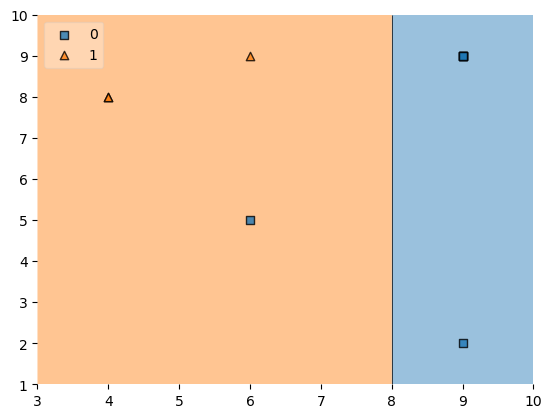

In [194]:
plot_decision_regions(X3, y3, clf=dt3, legend=2)

In [195]:
third_df['y_pred3'] = dt3.predict(X3)

In [196]:
third_df

,x1,x2,label,weights,y_pred3
6,6,5,0,0.1,1
3,4,8,1,0.1,0
3,4,8,1,0.1,0
6,6,5,0,0.1,0
3,4,8,1,0.1,1
6,6,5,0,0.1,0
3,4,8,1,0.1,1
8,9,9,0,0.1,0
3,4,8,1,0.1,1
3,4,8,1,0.1,0


In [197]:
alpha3 = calculate_model_weight(0.4)

In [198]:
print(alpha1, alpha2, alpha3)

0.42364893019360184 1.0986122886681098 0.2027325540540821


In [199]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [200]:
dt2.predict(query)

array([1], dtype=int64)

In [201]:
dt3.predict(query)

array([1], dtype=int64)

In [203]:
alpha1*1 + alpha2*1 + alpha3 *1

1.7249937729157938

In [204]:
np.sign(1.725)

1.0

In [205]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0], dtype=int64)

In [206]:
dt2.predict(query)

array([0], dtype=int64)

In [207]:
dt3.predict(query)

array([0], dtype=int64)

In [208]:
alpha1*(-1) + alpha2*(-1) + alpha3 * (-1) # for 1 multiply by 1 and for 0 multiply by -1

-1.7249937729157938

In [209]:
np.sign(-1.725)

-1.0